<h4>
Resolução da atividade prática:
</h4>

<p>
Tópico A - Implemente o algoritmo K-Means visto em sala de aula<br>
    <br>i.	Medida de proximidade: distância Euclidiana
    <br>ii.	Centróides iniciais: escolher aleatoriamente K objetos da base de dados
    <br>iii.	K: parâmetro de entrada, especificado pelo usuário
    <br>iv.	O laço de repetição executado até a convergência do algoritmo terá limite máximo de 100 iterações
    <br>v.	Casos de empate na associação de um elemento ao centróide: escolher o primeiro.
</p>

<p>
Tópico B - Execute a técnica implementada usando uma base de dados pública, como por exemplo a base Íris<br>
</p>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from sklearn.decomposition import PCA

import tkinter as tk
from tkinter import filedialog

In [3]:
'''
    Importando o dataset a ser usado no
    processo de agrupamento.
    
    * A função select_file() utiliza a  
      biblioteca tkinter é utilizada
      para criar uma janela de diálogo 
      de seleção de arquivo

    * A função dropClass(column, dataset)
      exclui alguma coluna, a ser especificado
      pelo nome no parâmetro 'column'

    * A função normalize(dataset) aplica
      a normalização min-max no dataset
'''
def select_file():

    root = tk.Tk()
    root.withdraw() 
    arquivo = filedialog.askopenfilename(title="Selecione um arquivo .csv", 
                                         filetypes=(("Arquivos CSV", "*.csv"), 
                                         ("Todos os arquivos", "*.*")))
    return arquivo 

def dropClass(column, dataset):
    dataset.drop(column, axis=1, inplace=True)
    return dataset

def normalize(dataset):
    return (dataset-dataset.min())/(dataset.max()-dataset.min())

dataframe = select_file()
datasetPD = pd.read_csv(dataframe)

classColumn = input('Nome da coluna de classes à ser excluída (caso exista): ')
if classColumn in datasetPD:
    datasetPD = dropClass(classColumn, datasetPD)

'''   
    Filtro de normalização dos dados
'''
datasetPD = normalize(datasetPD)
display(datasetPD) 


,A,B,C,D
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [4]:
'''   
    Redução da dimensionalidade para
    a aplicação do algorítmo k-means
'''

pca2 = PCA(2)
dataReduced = pca2.fit_transform(datasetPD)
df = pd.DataFrame(dataReduced)
display(df)

,0,1
0,-0.630361,0.111556
1,-0.623546,-0.100313
2,-0.669793,-0.047220
3,-0.654633,-0.098791
4,-0.648263,0.137558
...,...,...
145,0.551755,0.058990
146,0.406278,-0.172227
147,0.447293,0.036996
148,0.489218,0.149121


In [59]:
''' 
    Criação da classe K_means, sendo dotado das seguintes funções:

    * __init__ -> Caso os parâmetros não sejam definidos no momento da instância
                  valores padrões são utilizados para a inicialização, sendo eles:
                  - k = quantidade desejada de clusters
                  - max_iterations = valor máximo de iterações do algoritmo 
                  - tolerance = tolerância de variação dos centróides

    * euclidean_distance -> Realiza o calculo da distância eclidiana entre dois 
                            pontos definidos 
                        
    * predict -> Realiza a predição de um cluster para um dado objeto
    * fit -> Função de treinamento. É responsável por executar o kmeans
      e definir os cluster, bem como incluir os objetos a cada cluster
'''

class K_Means:

    def __init__(self, k = 2, tolerance = 0.001, max_iter = 100):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance
    
    def euclidean_distance(self, point1, point2):
        return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2) 
        
    def predict(self, point): 
        '''  
            É realizado o calculo das distâncias entre um determinado ponto
            e cada um dos centróides definidos pelo agrupamento. O cluster que
            resultar na menor distância sera o resultado da predição

            obs: A função np.linalg.norm() retorna a distância euclidiana,
                 o uso desta função é mais eficiente para este calculo  
        '''
        distances = [np.linalg.norm(point - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    def fit(self, data):
        np.random.seed(3)
        self.centroids = {} # Inicialização do dicionário de centroides

        '''  
            A inicialização dos centróides é feita de maneira simples:
            * São escolhidos K centróides aleatoriamente do dataset.
        '''
        for i in range(self.k):
            
            self.centroids[i] = data[np.random.choice(len(data), 1, replace=False)[0]]
        
        for i in range(self.max_iterations): 

            self.classes = {} # Inicialização do dicionário de classes

            for j in range(self.k):
                self.classes[j] = [] # Inicialização do array de distâncias
                
            '''  
                Sera computada as distancias euclidianas de um determinado 
                ponto i com todos os centróides definidos. Após o preenchimento
                da lista de distâncias, será definido o cluster_index, que 
                representa o índice do cluster que obteve a menor distância 
                euclidiana com o ponto (O mesmo cluster_index também será 
                utilizado como index da 'classe' para definir para qual cluster
                o ponto será alocado).  

                Obs: O mesmo processo será repetido para todos os pontos do dataset
   
            '''
            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point, self.centroids[index]))
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)

            '''  
                Previous é um dicionário python com base nos centróides, que 
                armazena os valores prévios dos centróides definidos
            '''
            previous = self.centroids
        
            ''' 
                Para cada índice de cluster dentro do dicionário de classes
                é calculado um novo valor de centróide, levando em consideraço a média 
                dos valores dos pontos que foram alocados do dicionário 'classes' no 
                trecho de código anterior: self.classes[cluster_index].append(point)

                obs: A flag isOptimal é definida como True
            '''
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0) 
            isOptimal = True
            
            '''  
                Para cada centroid definido, será avaliada o qual foi a variação
                de valor do novo centróide calculado. Se a porcentagem da varição
                for superior à tolerância estabelecida previamente, o loop de execução
                continua, caso contrário (isOptimal is True), a execução é encerrada. 
            '''
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            if isOptimal:
                break

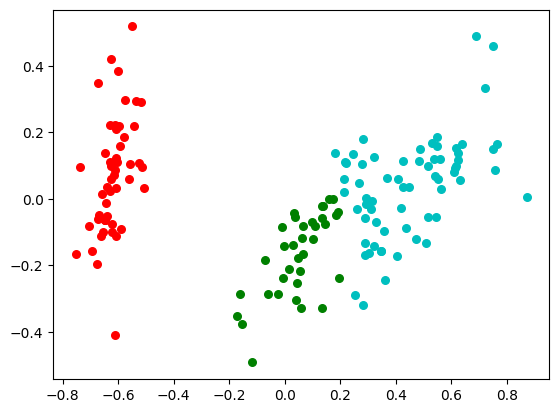

In [63]:
'''  
    Definição da instância da classe k_means criada
    e treinamento com a base de dados iris_dataset
'''
k_means = K_Means(k = 3, tolerance = 0.001, max_iter = 100)
k_means.fit(dataReduced)
#display(k_means.classes)

'''  
    Definição das possíveis cores para rotular
    os cluster no processo de treinamento (fit)
'''
colors = 10*["r", "g", "c", "b", "k"]

'''  
    Uma cor será associada para cada um dos clusters definidos
    e cada um dos objetos no dicionário de dados de classe será
    plotado em um 'scatter graph' (gráfico de dispersão)
'''
for cluster_index in k_means.classes:
        color = colors[cluster_index]
        for features in k_means.classes[cluster_index]:
            plt.scatter(features[0], features[1], color = color,s = 30)


<P>
Tópico C - O programa deverá produzir como saída um arquivo indicando para cada elemento, o grupo ao qual ele foi associado.<br>   
Tópico D - Se estiver usando alguma ferramenta de alto nível para programa em Python, é necessario de enviar também o arquivo .py  
</P>

In [66]:
''' 
    Os dados de predição serão adicionados 
    ao dataset original (como uma coluna extra
    indicado o cluster ao qual o objeto pertence)
    e o novo conteúdo será exportado em formato CSV.
'''
classes = []
for i in range(len(dataReduced)):
    classes.append(k_means.predict(dataReduced[i]))

OutputCSV = pd.read_csv(dataframe)
OutputCSV

if 'Grupo' not in OutputCSV:
    OutputCSV.insert(OutputCSV.shape[1], 'Grupo', classes, False)

else:
    print('Classificação já atribuída')

OutputCSV.to_csv('Resultado.csv' )
display(OutputCSV)

,A,B,C,D,ESPECIE,Grupo
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
